In [32]:
import numpy as np
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt
import math
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

# Part 1: Binning degree distributions

A. Binning real numbers

Let's do a gentle start and use the random library generate 5000 data points from a Gaussian distribution.

In [2]:
x = np.random.normal(loc=2, scale=0.125, size=5000)

Now, let's use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?

In [3]:
bins = 10
ranged = None
normed = None
weights = None
density = None
hist = np.histogram(x, bins, ranged, normed, weights, density)

In [4]:
hist

(array([   9,   78,  343,  870, 1360, 1329,  735,  231,   43,    2],
       dtype=int64),
 array([1.54822567, 1.6410721 , 1.73391853, 1.82676496, 1.91961139,
        2.01245782, 2.10530425, 2.19815068, 2.29099711, 2.38384354,
        2.47668997]))

It produces two arrays, one with limit of bins and one with the amount of data points in each bin.
<br>The array of data points has a length of 10 while the array of bin limits has a length of 11. This is because it takes two bin limits to form one bin, but the two outer limits are only used once. Because of this, we simply remove the top limit.

In [5]:
alteredY = []
for i in hist[0]:
    alteredY.append(i)
    alteredY.append(i)

In [7]:
alteredX = []
alteredX.append(hist[1][0])
for i in hist[1][1:-1]:
    alteredX.append(i)
    alteredX.append(i)
alteredX.append(hist[1][-1])

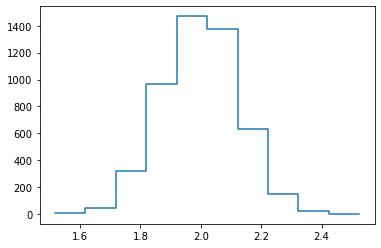

In [7]:
plt.plot(alteredX,alteredY)

B. Binning integers 


In [8]:
xp = np.random.poisson(lam=10, size=5000) 

min = xp[0]
max = xp[0]
for i in xp:
    if i > max:
        max = i
    if i < min:
        min = i
        
print("min: {}, max: {}".format(min,max))




min: 0, max: 24


[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5]


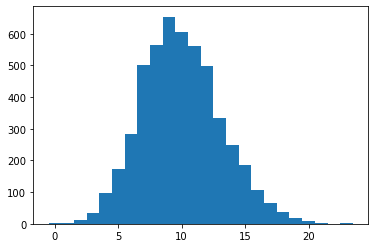

In [9]:
from tkinter import Grid


binE = [min-0.5]

for i in range(1,max+1):
    binE.append(binE[i-1]+1)
    
hist = np.histogram(xp,binE)


plt.bar(x=binE[0:-1], height= hist[0], width= 1.0, align= 'edge')


print(binE)


# Part 3: Watts-Strogatz Network 

Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p = 0, 0.1 and 1.

Calculate the average shortest path length <d> for each one. 


Describe what happens to the network when p = 1 

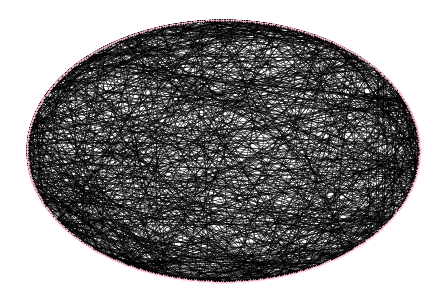

With a p-value of 0.0 the average shortest path length in the graph is 62.875751503006015
With a p-value of 0.1 the average shortest path length in the graph is 7.563486973947896
With a p-value of 1.0 the average shortest path length is the graph is  4.768496993987976


In [10]:
N = 500
k = 4
p = np.array([0,0.1,1])
# Drawing graph
G = nx.watts_strogatz_graph(N,k,p[0])
G2 = nx.watts_strogatz_graph(N,k,p[1])
G3 = nx.watts_strogatz_graph(N,k,p[2])

options = {
    'node_color': 'pink',
    'node_size': 0.5,
    'width': 0.5,
}



pos = nx.circular_layout(G)
nx.draw(G,pos, **options)

pos2 = nx.circular_layout(G2)
nx.draw(G2,pos2, **options)

pos3 = nx.circular_layout(G3)
nx.draw(G3,pos3, **options)


plt.show()

ShortPath_G = nx.average_shortest_path_length(G)
ShortPath_G2 = nx.average_shortest_path_length(G2)
ShortPath_G3 = nx.average_shortest_path_length(G3)
print('With a p-value of 0.0 the average shortest path length in the graph is %s' % ShortPath_G)
print('With a p-value of 0.1 the average shortest path length in the graph is %s' % ShortPath_G2)
print('With a p-value of 1.0 the average shortest path length is the graph is  %s' % ShortPath_G3)

B

In [11]:
def GraphGenerator(p):
    n = 50 
    k = 6
    N = 500
    AvS = []
    for i in range(1,n+1):
    
        G = nx.watts_strogatz_graph(N,k,p)
        S = nx.average_shortest_path_length(G)
        AvS.append(S)
    A = np.mean(AvS)
    M = np.std(AvS)
    
    return A,M 
 
A,M = GraphGenerator(0)
A1,M1 = GraphGenerator(0.01)  
A2,M2 = GraphGenerator(0.03)
A3,M3 = GraphGenerator(0.05)
A4,M4 = GraphGenerator(0.1)
A5,M5 = GraphGenerator(0.2)  

x = np.array([0,0.01,0.03,0.05,0.1,0.2])
y = np.array([A,A1,A2,A3,A4,A5])
E = np.array([M,M1,M2,M3,M4,M5])

import matplotlib.pyplot as plt
plt.plot(x, y, 'o-')
plt.errorbar(x,y,yerr=E )
plt.ylabel('<d>')
plt.xlabel('p')
plt.title('Wattz-strogats Network with p = {0, 0.01, 0.03, 0.05, 0.1, 0.2}')

plt.show()



KeyboardInterrupt: 

# 4 The Barabasi-Albert Model

In [10]:
BA = nx.Graph()
BA.add_edge(0, 1)
nodeRep = [0,1]

In [11]:
for i in range(2,100):
    choice = random.choice(nodeRep)
    BA.add_edge(i,choice)
    nodeRep.append(i)
    nodeRep.append(choice)

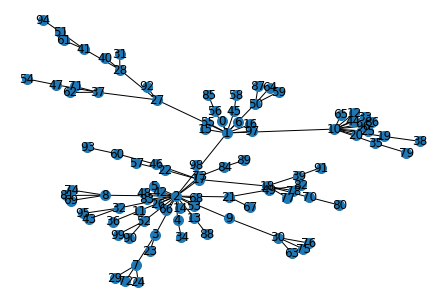

In [12]:
nx.draw(BA, with_labels=True, node_size=100)

In [13]:
BA2 = nx.Graph()
BA2.add_edge(0, 1)
nodeRep2 = [0,1]

In [14]:
for i in range(2,5000):
    choice = random.choice(nodeRep2)
    BA2.add_edge(i,choice)
    nodeRep2.append(i)
    nodeRep2.append(choice)

In [15]:
max = BA2.degree[0]
min = BA2.degree[0]
dd = []
for i in range(len(BA2.nodes)):
    dd.append(BA2.degree[i])
    if BA2.degree[i]<min:
        min = BA2.degree[i]
    if BA2.degree[i]>max:
        max = BA2.degree[i]

In [16]:
binEdges = [min-0.5]
for i in range(1,max+1):
    binEdges.append(binEdges[i-1]+1)

In [17]:
BA2_hist = np.histogram(dd, binEdges)

<BarContainer object of 138 artists>

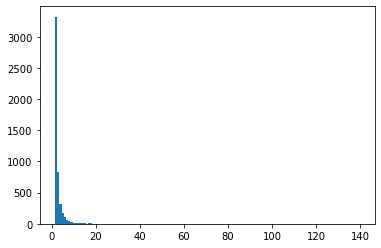

In [18]:
plt.bar(x=binEdges[1:], height=BA2_hist[0], width=1.0, align = 'edge')

In [19]:
for i in range(len(binEdges)):
    binEdges[i] = binEdges[i] + 0.5

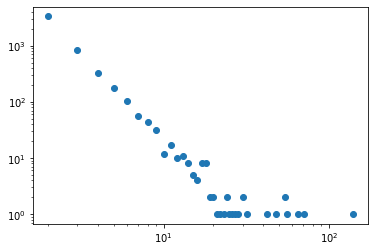

In [20]:
plt.loglog(binEdges[1:], BA2_hist[0], 'o')

In [23]:
xLog = []
yLog = []
for i in range(len(binEdges)-1):
    if BA2_hist[0][i] != 0:
        xLog.append(math.log10(binEdges[i+1]))
        yLog.append(math.log10(BA2_hist[0][i]))

# 5 Power-laws and the friendship paradox

Pick a node i at random (e.g. use random.choice). Find its degree. Find i's neighbors. And calculate their average degree. Compare the two numbers to check if it's true that i's friends (on average) have more friends than. Do this 1000 times. How many out of those 1000 times is the friendship paradox true in F-BA?

In [40]:
F_BA = BA2

In [57]:
paradox = 0
for i in range(1000):
    
    count = 0.0
    sum = 0.0
    choice = random.choice(list(F_BA.nodes))
    for n in F_BA.neighbors(choice):
        count = count + 1
        sum = sum + F_BA.degree(n)
    if (sum/count)>F_BA.degree(choice):
        paradox = paradox + 1
        
print("{}/{}".format(paradox,1000))

858/1000


What if the power law is flatter? Will the fraction of times the paradox is true be higher or lower?

The flatter the power law is, the wider it will spread. This means that the extreme nodes will be even more extreme with a very high degree.

Because more nodes, or people as in this case, will have a very high amount of friends the average amount of friends increases to an extent where very few people have more friends than the average of their friend group.

In [44]:
sequence = nx.utils.powerlaw_sequence(n = 1000, exponent = 1.5)
sequence = [round(num) for num in sequence]
sequence.sort()

In [45]:
#checking if sum of degrees is odd, fixing it if it is
sum = 0
for degree in sequence:
    sum = sum + degree
if (sum % 2) != 0:
    sequence[0] = sequence[0] + 1
    

In [46]:
model = nx.configuration_model(sequence)

In [47]:
dd = []
min = model.degree[0]
max = model.degree[0]
for i in range(len(model.nodes)):
    dd.append(model.degree[i])
    if model.degree[i]<min:
        min = model.degree[i]
    if model.degree[i]>max:
        max = model.degree[i]

In [48]:
binEdges = [min-0.5]
for i in range(1,max+1):
    binEdges.append(binEdges[i-1]+1)

In [49]:
model_hist = np.histogram(dd, binEdges)

In [50]:
for i in range(len(binEdges)):
    binEdges[i] = binEdges[i] + 0.5

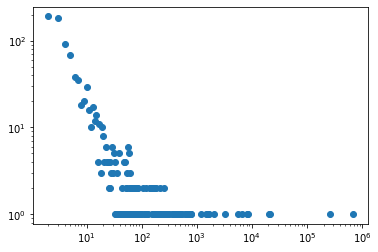

In [51]:
plt.loglog(binEdges[1:], model_hist[0], 'o')

In [44]:
paradox = 0
for i in range(len(model.nodes)):
    
    count = 0.0
    sum = 0.0
    choice = random.choice(list(model.nodes))
    for n in model.neighbors(choice):
        count = count + 1
        sum = sum + model.degree(n)
    if (sum/count)>model.degree(choice):
        paradox = paradox + 1
        
print("{}/{}".format(paradox,len(model.nodes)))

NameError: name 'model' is not defined